# Simple linear regression

Linear regression is a technique for modeling data by fitting it to a linear equation. Simple linear regression uses a 2D dataset consisting of one independent variable (*x*) and one dependent variable (*y*). Let's see how simple linear regression works by first implementing it by hand, and then implementing it with Scikit-learn. The dataset we'll use is a simple one containing information regarding poverty rates and teen birth rates in the 50 U.S. states plus the District of Columbia. The goal is to build a linear model that predicts the teen birth rate from the poverty rate.

## Simple linear regression without Scikit-learn

Scikit makes linear regression easy, but it's instructive to see how it's done without Scikit. Begin by loading the dataset from an external CSV file.

In [1]:
import pandas as pd

df = pd.read_csv('Data/poverty.csv')
df.head()

,State,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


The two columns we're interested in are "PovPct," which specifies the percentage of residents in the state that live below the poverty line, and "TeenBrth," which is the number of teen births per 1,000 residents. Plot the data to visualize the relationship between poverty rates and teen birth rates to determine whether a linear model is viable.

Text(0.5, 1.0, 'Teen Birth Rate as a Function of Poverty Level')

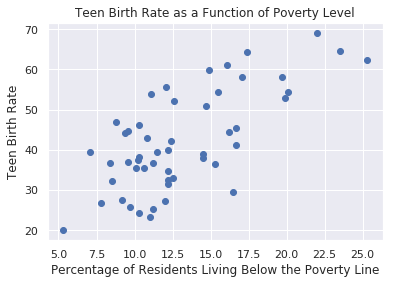

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

x = df['PovPct']
y = df['TeenBrth']

plt.scatter(x, y)
plt.xlabel('Percentage of Residents Living Below the Poverty Line')
plt.ylabel('Teen Birth Rate')
plt.title('Teen Birth Rate as a Function of Poverty Level')

There is a relatively linear relationship between the independent variable and the dependent variable, so let's fit a line to the data. `alpha` is the multiplier used to adjust `m` and `b` in each iteration and is sometimes referred to as the *learning rate*.

In [3]:
m = 0.0
b = 0.0
alpha = 0.001
mse_values = []
n = len(x)

# Adjust m and b for 10 iterations and record the MSE in each iteration
for i in range(11):
    predicted = (m * x) + b
    error = predicted - y
    mse = np.sum(error ** 2) / n
    mse_values.append(mse)
    m = m - (alpha * 2 * (np.sum(error * x) / n))
    b = b - (alpha * 2 * (np.sum(error) / n))

Did *m* and *b* converge sufficiently? Plot MSE for each iteration to find out.

Text(0, 0.5, 'Mean Squared Error')

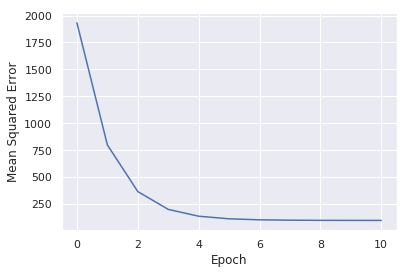

In [4]:
plt.plot(mse_values)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')

Show the resulting equation of a line.

In [5]:
print('y = ' + str(m) + 'x + ' + str(b))

y = 3.075530808134122x + 0.24450655686480965


Plot the line along with the data points.

Text(0.5, 1.0, 'Teen Birth Rate as a Function of Poverty Level')

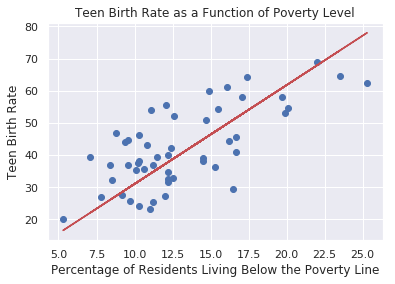

In [6]:
plt.scatter(x, y)
plt.plot(x, (m * x) + b, color='r')
plt.xlabel('Percentage of Residents Living Below the Poverty Line')
plt.ylabel('Teen Birth Rate')
plt.title('Teen Birth Rate as a Function of Poverty Level')

Now use the equation to predict the teen birth rate for a state in which 15% of the residents live below the poverty line.

In [7]:
(m * 15.0) + b

46.37746867887664

## Simple linear regression with Scikit-learn

Now let's see what the same model looks like when Scikit is available to lend a helping hand.

In [8]:
from sklearn.linear_model import LinearRegression

x = df[['PovPct']]
y = df[['TeenBrth']]

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Show the resulting equation of a line.

In [9]:
m = model.coef_[0][0]
b = model.intercept_[0]
print('y = ' + str(m) + 'x + ' + str(b))

y = 2.0254750978747924x + 15.673669794544377


Plot the line along with the data points.

Text(0.5, 1.0, 'Teen Birth Rate as a Function of Poverty Level')

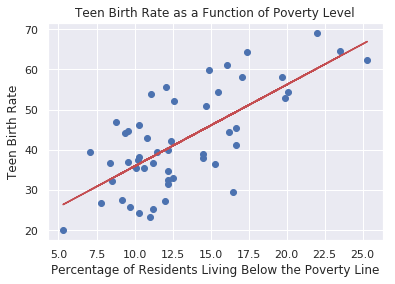

In [10]:
plt.scatter(x, y)
plt.plot(x, (m * x) + b, color='r')
plt.xlabel('Percentage of Residents Living Below the Poverty Line')
plt.ylabel('Teen Birth Rate')
plt.title('Teen Birth Rate as a Function of Poverty Level')

Predict the teen birth rate for a state in which 15% of the residents live below the poverty line.

In [11]:
model.predict([[15.0]])

array([[46.05579626]])